In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.prepared import prep
import matplotlib.pyplot as plt

In [3]:
dsug = pd.read_csv('data/db_sugar_maple.csv', dtype={'latitude': 'float64', 'longitude': 'float64'})


In [4]:
dsug

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k
0,1,ES,47.996187,94,-68.500146,364,4.2000,11.0,56.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
1,2,ES,47.849696,100,-68.513409,392,4.2000,11.0,56.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
2,25,ES,48.006817,100,-69.845383,263,4.3200,4.0,85.0,1.877924,...,10.672174,275.200,16.294031,90.193054,615.300,31.653698,-2.362497,5.388228,645.53110,2
3,46,ES,47.464966,100,-69.830670,187,3.5167,24.0,45.0,2.599420,...,12.382082,285.675,17.312328,82.792880,613.000,31.961720,-1.030399,6.622469,701.65955,2
4,52,ES,47.692467,100,-68.633707,334,3.8233,16.0,43.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565303,1658294,ES,48.267805,98,-68.241756,388,4.2000,11.0,56.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
565304,1658300,ES,48.226767,91,-68.151074,442,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
565305,1658302,ES,48.226779,96,-68.148912,414,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
565306,1658309,ES,48.619350,37,-67.341882,197,4.2000,11.0,56.0,1.677881,...,17.265238,296.875,15.893673,96.534830,630.800,31.110240,-2.917435,6.463537,658.10010,2


In [5]:
geometry = [Point(lon, lat) for lon, lat in zip(dsug['longitude'], dsug['latitude'])]
presences_gdf = gpd.GeoDataFrame(dsug.copy(), geometry=geometry, crs="EPSG:4326")

In [6]:
# 4. Reproyectar
from pyproj import Transformer
from shapely.ops import transform

In [8]:
print("Reproyectando presencias...")
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32198", always_xy=True)
presences_proj_geom = presences_gdf.geometry.apply(lambda geom: transform(transformer.transform, geom))
presences_proj = gpd.GeoDataFrame(presences_gdf.drop(columns='geometry'), geometry=presences_proj_geom)
presences_proj.set_crs("EPSG:32198", allow_override=True, inplace=True)

Reproyectando presencias...


,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k,geometry
0,1,ES,47.996187,94,-68.500146,364,4.2000,11.0,56.0,2.377832,...,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2,POINT (-10.88 444262.8)
1,2,ES,47.849696,100,-68.513409,392,4.2000,11.0,56.0,2.377832,...,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2,POINT (-1000.27 428030.35)
2,25,ES,48.006817,100,-69.845383,263,4.3200,4.0,85.0,1.877924,...,275.200,16.294031,90.193054,615.300,31.653698,-2.362497,5.388228,645.53110,2,POINT (-100025.27 446380.88)
3,46,ES,47.464966,100,-69.830670,187,3.5167,24.0,45.0,2.599420,...,285.675,17.312328,82.792880,613.000,31.961720,-1.030399,6.622469,701.65955,2,POINT (-100048.27 386313.13)
4,52,ES,47.692467,100,-68.633707,334,3.8233,16.0,43.0,2.377832,...,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2,POINT (-10006.36 410613.54)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565303,1658294,ES,48.267805,98,-68.241756,388,4.2000,11.0,56.0,1.643488,...,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2,POINT (19096.44 474386.79)
565304,1658300,ES,48.226767,91,-68.151074,442,3.8233,16.0,43.0,1.643488,...,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2,POINT (25824.25 469869.87)
565305,1658302,ES,48.226779,96,-68.148912,414,3.8233,16.0,43.0,1.643488,...,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2,POINT (25984.26 469871.96)
565306,1658309,ES,48.619350,37,-67.341882,197,4.2000,11.0,56.0,1.677881,...,296.875,15.893673,96.534830,630.800,31.110240,-2.917435,6.463537,658.10010,2,POINT (85006.15 513968.98)


In [9]:
# 1. Cargar provincias de Canadá
print("Cargando shapefile...")
provincias = gpd.read_file("data/Politic_divition/lpr_000b21a_e.shp")
print(f"CRS detectado: {provincias.crs}")

# 2. Filtrar sólo Québec
print("Filtrando Québec...")
quebec_map = provincias[provincias['PRENAME'] == 'Quebec'].copy()

# 3. Limpiar geometrías
print("Limpiando geometrías...")
quebec_map = quebec_map[quebec_map.geometry.notnull()]
quebec_map = quebec_map[~quebec_map.geometry.is_empty]
quebec_map = quebec_map[quebec_map.is_valid]

# 4. Reproyectar de EPSG:3347 a EPSG:32198
print("Reproyectando Québec a EPSG:32198...")
quebec_proj = quebec_map.to_crs("EPSG:32198")

# 5. Verificar límites
print("Calculando límites...")
minx, miny, maxx, maxy = quebec_proj.total_bounds
print(f"Límites: minx={minx}, miny={miny}, maxx={maxx}, maxy={maxy}")

Cargando shapefile...
CRS detectado: EPSG:3347
Filtrando Québec...
Limpiando geometrías...
Reproyectando Québec a EPSG:32198...
Calculando límites...
Límites: minx=-830844.1785054514, miny=117973.29776183645, maxx=783631.6436369262, maxy=2091048.2097644005


In [10]:
print("Generando zona de exclusión...")
buffer_m = 1000  # Buffer de 1000 metros
exclusion_zone = presences_proj.buffer(buffer_m)
exclusion_union = unary_union(exclusion_zone)
exclusion_prepared = prep(exclusion_union)

Generando zona de exclusión...


In [11]:
print("Calculando límites de Québec...")
minx, miny, maxx, maxy = quebec_proj.total_bounds

Calculando límites de Québec...


In [18]:
print("Generando puntos candidatos...")
n_desired = 40000  # Número de pseudoausencias que quieres
batch_multiplier = 5  # Generar más para filtrar después

x_coords = np.random.uniform(minx, maxx, n_desired * batch_multiplier)
y_coords = np.random.uniform(miny, maxy, n_desired * batch_multiplier)
candidate_points = [Point(x, y) for x, y in zip(x_coords, y_coords)]

Generando puntos candidatos...


In [26]:
# 9. Filtrar puntos: dentro de Québec y fuera del buffer
quebec_union = quebec_proj.unary_union
quebec_prepared = prep(quebec_union)

valid_points = []
for pt in candidate_points:
    if quebec_prepared.contains(pt) and not exclusion_prepared.contains(pt):
        valid_points.append(pt)
        if len(valid_points) >= n_desired:
            break

print(f"Total pseudoausencias generadas: {len(valid_points)}")

C:\Users\jorge\AppData\Local\Temp\ipykernel_10476\3944305408.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  quebec_union = quebec_proj.unary_union


Total pseudoausencias generadas: 40000


In [27]:
# 10. Crear GeoDataFrame de pseudoausencias
pseudo_gdf = gpd.GeoDataFrame(geometry=valid_points, crs="EPSG:32198")

# 11. Guardar a GeoJSON
print("Guardando pseudoausencias en archivo...")
pseudo_gdf.to_file("data/pseudoausencias_quebec.geojson", driver="GeoJSON")

Guardando pseudoausencias en archivo...


Graficando...


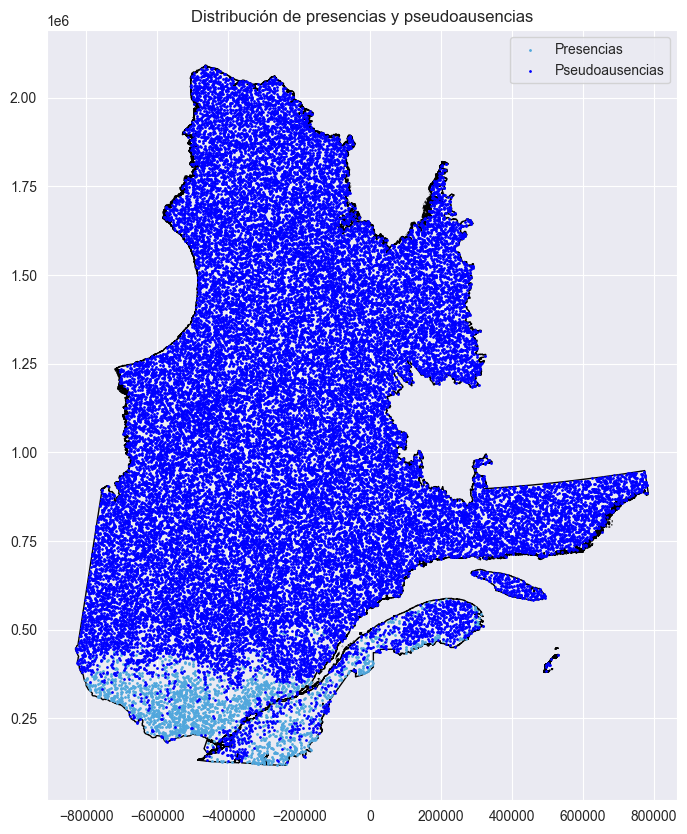

In [28]:
print("Graficando...")
ax = quebec_proj.plot(color='none', edgecolor='black', figsize=(10, 10))
presences_proj.sample(2000).plot(ax=ax, color='#51a7dc', markersize=1, label="Presencias")
pseudo_gdf.plot(ax=ax, color='blue', markersize=1, label="Pseudoausencias")
plt.legend()
plt.title("Distribución de presencias y pseudoausencias")
plt.show()

In [29]:
pseudo_gdf = gpd.GeoDataFrame(geometry=valid_points, crs="EPSG:32198")

# 11. Reproyectar de regreso a EPSG:4326 (latitud-longitud)
pseudo_gdf_latlon = pseudo_gdf.to_crs("EPSG:4326")

# 12. Extraer columnas de latitud y longitud
pseudo_gdf_latlon['longitude'] = pseudo_gdf_latlon.geometry.x
pseudo_gdf_latlon['latitude'] = pseudo_gdf_latlon.geometry.y

# 13. Crear un DataFrame plano si quieres
pseudo_df = pseudo_gdf_latlon[['latitude', 'longitude']].copy()

# 14. Guardar como CSV
pseudo_df.to_csv("data/pseudoausencias_latlon_sugarmaple.csv", index=False)


In [32]:
dsugm = dsug.drop(columns=['elev'])
pseusug = pseudo_df.copy()

In [33]:
print(dsugm.columns)

Index(['Unnamed: 0', 'essence', 'latitude', 'forest', 'longitude', 'ph',
       'clay', 'sand', 'bio1', 'bio2', 'bio3', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio14', 'bio15', 'bio18', 'bio20', 'bio23', 'bio24',
       'bio27', 'bio30', 'bio31', 'bio34', 'cluster_k'],
      dtype='object')


In [31]:
ruta_rasters = "G:/Quebec_maple/bioclim_data/recortados_alineados"

variables = [
'ph', 'clay', 'sand', 'bio1', 'bio2', 'bio3', 'bio8', 'bio9', 'bio10',
'bio11', 'bio12', 'bio14', 'bio15', 'bio18', 'bio20', 'bio23', 'bio24',
'bio27', 'bio30', 'bio31', 'bio34'
]